In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from warnings import filterwarnings
filterwarnings('ignore')

Skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

In [2]:
data_train = pd.read_csv('/home/the_rogue/Python_Project/Python_DataSets_file_/tr.csv')

data_test = pd.read_csv('/home/the_rogue/Python_Project/Python_DataSets_file_/tst.csv')

pd.set_option('display.max_columns', 100) # display 100 columns
pd.set_option('display.max_rows', 100) # display 100 lines

EDA

In [3]:
data_train.head()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,5448.79,0.09,302.71,17,1,1,0,16.0,9.0,38.0,22.0,5.0,False
1,1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,936.71,0.05,52.04,11,0,1,0,11.0,11.0,18.0,14.0,3.0,False
2,2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,1754.01,0.07,97.45,8,0,1,0,12.0,11.0,28.0,17.0,3.0,False
3,3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,473.66,0.03,26.31,4,0,2,0,8.0,6.0,16.0,7.0,1.0,True
4,4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,365.67,0.02,20.31,7,0,2,0,7.0,6.0,10.0,10.0,3.0,False


In [4]:
data_test.head()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
0,101763,33.0,5.0,1.0,4.0,144.0,824.82,0.04,26.96,30.05,22636.74,0.27,1257.60,30,0,3,0,21.0,23.0,87.0,57.0,9.0
1,101764,27.0,8.0,8.0,2.0,125.0,646.24,0.04,22.82,27.22,14482.46,0.22,804.58,23,0,2,0,18.0,19.0,70.0,49.0,15.0
2,101765,130.0,11.0,7.0,10.0,545.0,3831.40,0.02,48.15,66.17,116160.08,1.28,6453.34,99,9,17,1,26.0,53.0,333.0,244.0,21.0
3,101766,65.0,7.0,1.0,7.0,156.0,855.71,0.06,17.23,49.89,16135.47,0.29,896.42,45,8,10,0,15.0,26.0,88.0,60.0,13.0
4,101767,22.0,3.0,1.0,3.0,52.0,238.42,0.10,9.60,26.70,2624.49,0.08,145.80,16,0,4,0,12.0,15.0,30.0,24.0,5.0


In [5]:
data_train.isna().sum().sum(), data_test.isna().sum().sum()

(0, 0)

In [6]:
data_train.shape, data_test.shape

((101763, 23), (67842, 22))

In [7]:
data_train.describe()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
count,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,1.017630e+05,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000
mean,50881.000000,37.347160,5.492684,2.845022,3.498826,96.655995,538.280956,0.111634,13.681881,27.573007,2.085359e+04,0.179164,1141.357982,22.802453,1.773945,3.979865,0.196604,11.896131,15.596671,57.628116,39.249698,9.839549
std,29376.592059,54.600401,7.900855,4.631262,5.534541,171.147191,1270.791601,0.100096,14.121306,22.856742,1.905714e+05,0.421844,9862.795472,38.541010,5.902412,6.382358,0.998906,6.749549,18.064261,104.537660,71.692309,14.412769
min,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,25440.500000,13.000000,2.000000,1.000000,1.000000,25.000000,97.670000,0.050000,5.600000,15.560000,5.647300e+02,0.030000,31.380000,7.000000,0.000000,1.000000,0.000000,8.000000,7.000000,15.000000,10.000000,3.000000
50%,50881.000000,22.000000,3.000000,1.000000,2.000000,51.000000,232.790000,0.090000,9.820000,23.360000,2.256230e+03,0.080000,125.400000,14.000000,0.000000,2.000000,0.000000,11.000000,12.000000,30.000000,20.000000,5.000000
75%,76321.500000,42.000000,6.000000,3.000000,4.000000,111.000000,560.250000,0.150000,18.000000,34.340000,1.019324e+04,0.190000,565.920000,26.000000,1.000000,5.000000,0.000000,16.000000,20.000000,66.000000,45.000000,11.000000
max,101762.000000,3442.000000,404.000000,165.000000,402.000000,8441.000000,80843.080000,1.000000,418.200000,569.780000,1.684662e+07,26.950000,935923.390000,2824.000000,344.000000,219.000000,43.000000,410.000000,1026.000000,5420.000000,3021.000000,503.000000


In [8]:
data_test.describe()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
count,67842.000000,67842.000000,67842.000000,67842.000000,67842.000000,67842.000000,67842.000000,67842.000000,67842.000000,67842.000000,6.784200e+04,67842.000000,67842.000000,67842.000000,67842.000000,67842.000000,67842.000000,67842.000000,67842.000000,67842.000000,67842.000000,67842.000000
mean,135683.500000,37.855945,5.559462,2.857699,3.535715,98.222178,548.422497,0.111521,13.762472,27.635377,2.216432e+04,0.182075,1218.682009,23.131924,1.832493,4.020739,0.200834,11.909776,15.678370,58.325212,39.845258,9.985923
std,19584.442818,55.793918,8.237389,4.666370,5.339085,179.123492,1318.416828,0.100840,14.487425,23.420521,2.072770e+05,0.418493,10739.081373,39.606659,6.229052,7.136069,1.044581,6.974254,17.979368,105.491447,72.756320,15.342975
min,101763.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,118723.250000,13.000000,2.000000,1.000000,1.000000,25.000000,96.210000,0.040000,5.500000,15.540000,5.629400e+02,0.030000,31.270000,7.000000,0.000000,1.000000,0.000000,8.000000,7.000000,15.000000,10.000000,3.000000
50%,135683.500000,22.000000,3.000000,1.000000,2.000000,51.000000,232.790000,0.090000,9.820000,23.230000,2.276780e+03,0.080000,126.490000,14.000000,0.000000,2.000000,0.000000,12.000000,12.000000,30.000000,20.000000,5.000000
75%,152643.750000,42.000000,6.000000,3.000000,4.000000,111.000000,560.250000,0.140000,18.000000,34.270000,1.011243e+04,0.190000,561.802500,26.000000,1.000000,5.000000,0.000000,16.000000,20.000000,66.000000,44.000000,11.000000
max,169604.000000,1891.000000,470.000000,165.000000,402.000000,8441.000000,80843.080000,1.000000,418.200000,569.780000,1.684662e+07,18.380000,935923.390000,1599.000000,344.000000,447.000000,42.000000,411.000000,1026.000000,3368.000000,2301.000000,826.000000


In [9]:
### copy our dataset becouse it can healp in future and drop not important columns

df_train = data_train.copy(deep=True)
df_test = data_test.copy(deep=True)
df_train.drop(columns = 'id', axis = 1, inplace=True)
df_test.drop(columns = 'id', axis = 1, inplace=True)

In [10]:
df_train['defects'].unique()

array([False,  True])

In [11]:
### We check how many observations there are for each class and whether 
### they are strongly balanced or vice versa
df_train.groupby('defects')['defects'].count()

defects
False    78699
True     23064
Name: defects, dtype: int64

In [12]:
df_train['defects_map']= df_train['defects'].map({True: 1, False: 0})

In [13]:
defects_map = df_train['defects_map']

In [14]:
df_train.head(1)

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects,defects_map
0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,5448.79,0.09,302.71,17,1,1,0,16.0,9.0,38.0,22.0,5.0,False,0


<Axes: >

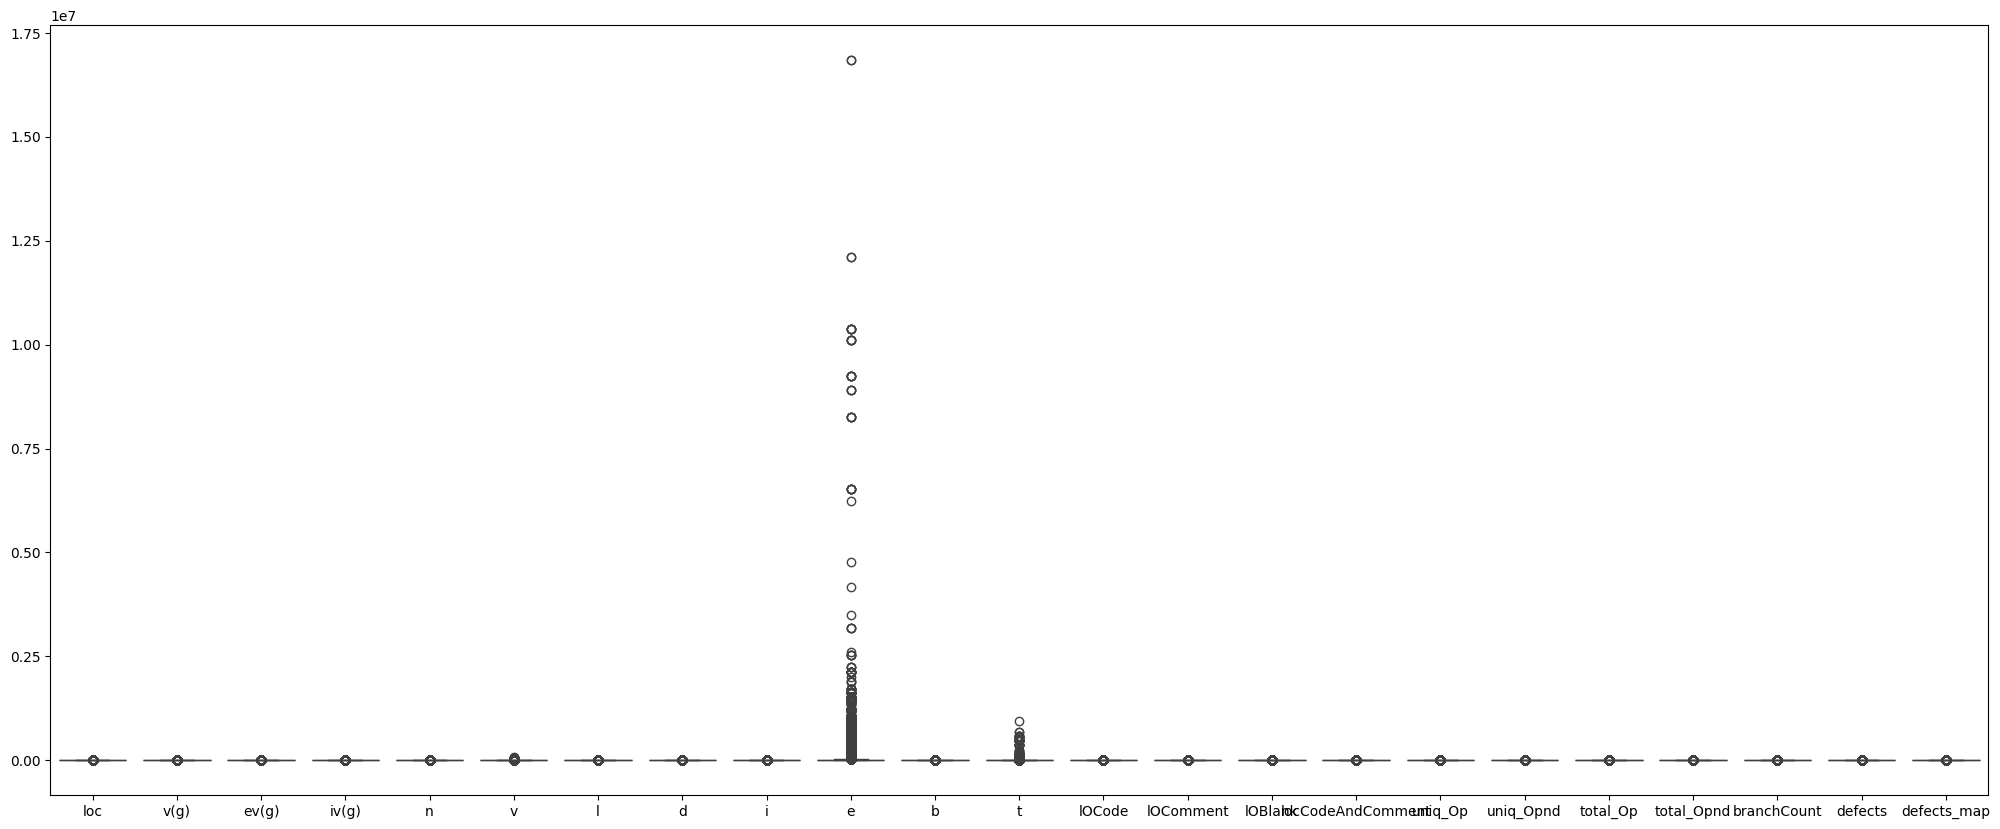

In [15]:
plt.figure(figsize=(25,10))
sns.boxplot(df_train)

<Axes: >

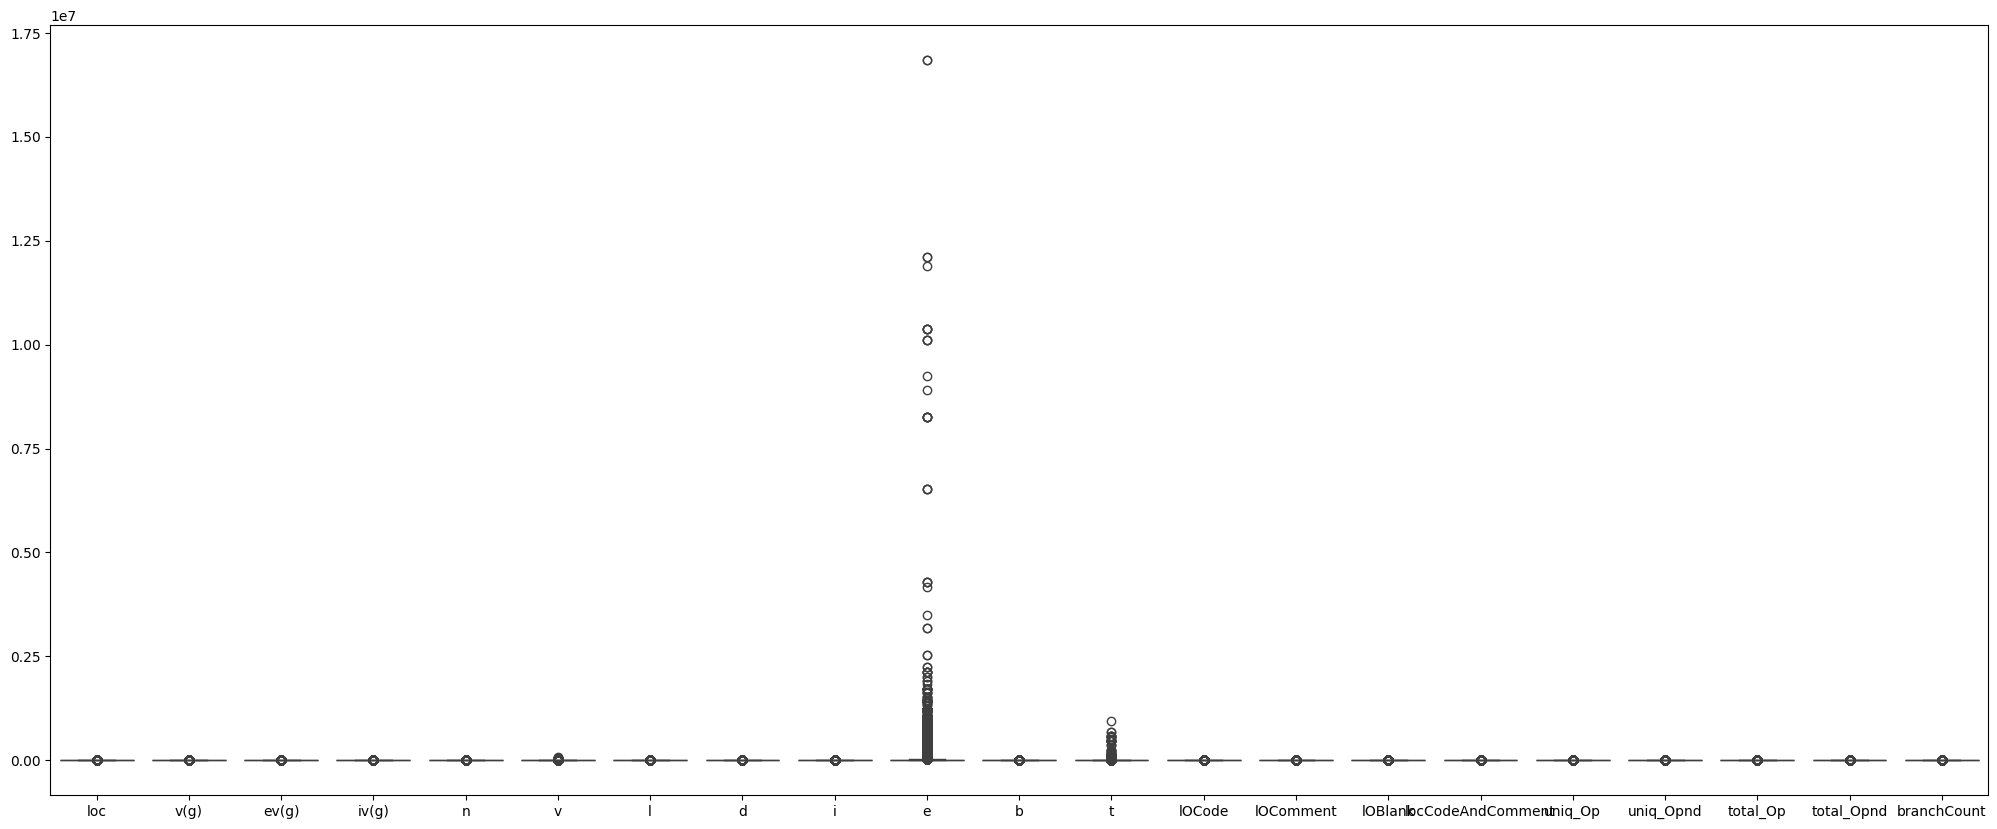

In [16]:
plt.figure(figsize=(25,10))
sns.boxplot(df_test)

Ferst of all lets Standartscale our data

We observe a large number of outliers and before building our model we need to try to get rid of them, let's first pass our sample through the min max scaler and then apply the boxcox transformation, arguing that we have data that came from another machine and the distribution in it is therefore can greatly interfere with our task

In [17]:
min_max_ = MinMaxScaler(feature_range = (1, 10))

In [18]:
df_train = pd.DataFrame(min_max_.fit_transform(df_train.drop(columns=['defects', 'defects_map'], axis= 1)), columns=df_train.drop(columns=['defects', 'defects_map'], axis= 1).columns)

df_test = pd.DataFrame(min_max_.transform(df_test), columns=df_test.columns)

In [19]:
len(df_train.columns), len(df_test.columns)

(21, 21)

In [20]:
##### globsl function

def global_function(train, test):
    #
  # copy our data
    df_tr = train.copy(deep=True)
    df_tst = test.copy(deep=True)
    df_tr['id'] = df_tr.index
    df_tst['id'] = df_tr['id'].iloc[-1] + range(1, df_tst.shape[0]+1)

  # concat data
    gl_data = pd.concat([df_tr, df_tst], ignore_index=True)
  # function for boxcoc
    def apply_boxcox(series):
        #
        transf_data, _w = stats.boxcox(series)
        return transf_data
  #  apply boxcox
    df_i_d = gl_data['id']
    gl_data.drop(columns = 'id', axis = 1, inplace=True)
    gl_data = gl_data.apply(apply_boxcox)
    gl_data['id'] = df_i_d
  # lest get back our two data
    df_tr = gl_data[gl_data['id'] < df_tst['id'].loc[0]]
    df_tst = gl_data[gl_data['id'] >= df_tst['id'].loc[0]]
    df_tr = df_tr.reset_index(drop=True)
    df_tst = df_tst.reset_index(drop=True)
  #
    df_tr.drop(columns = 'id', axis = 1, inplace=True)
    df_tst.drop(columns = 'id', axis = 1, inplace=True)
    return df_tr, df_tst

In [21]:
df_train, df_test = global_function(train = df_train, test = df_test)

In [22]:
df_test.shape, df_train.shape

((67842, 21), (101763, 21))

<Axes: >

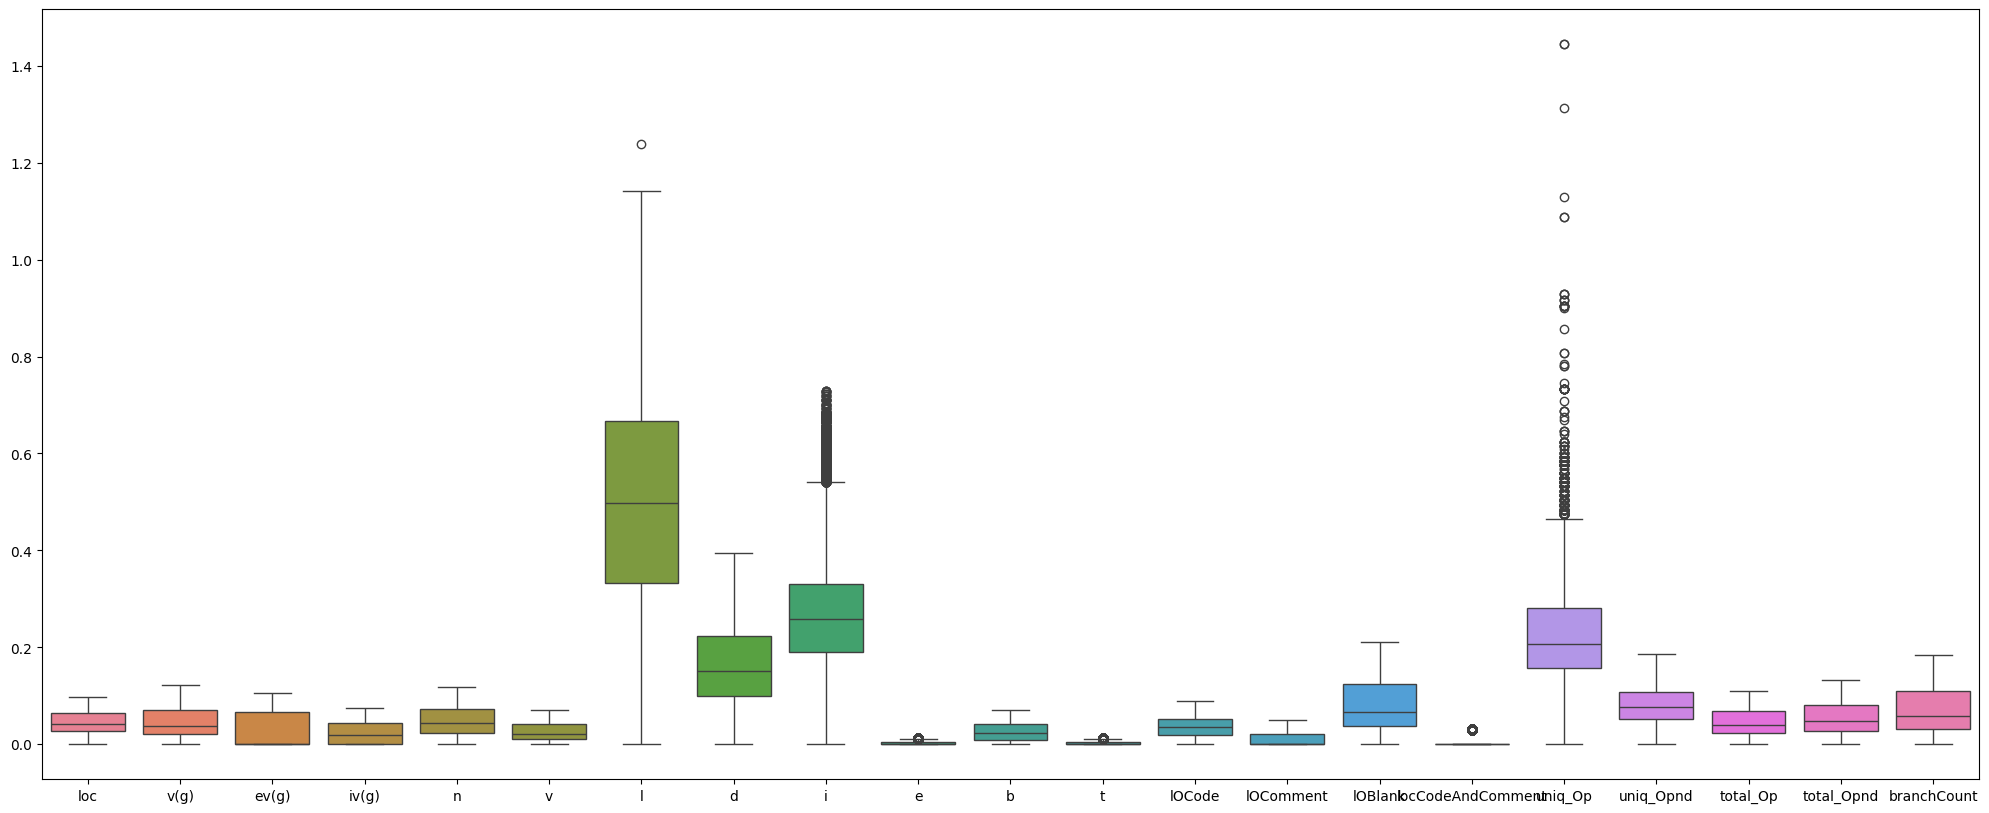

In [23]:
plt.figure(figsize=(25,10))
sns.boxplot(df_train)

<Axes: >

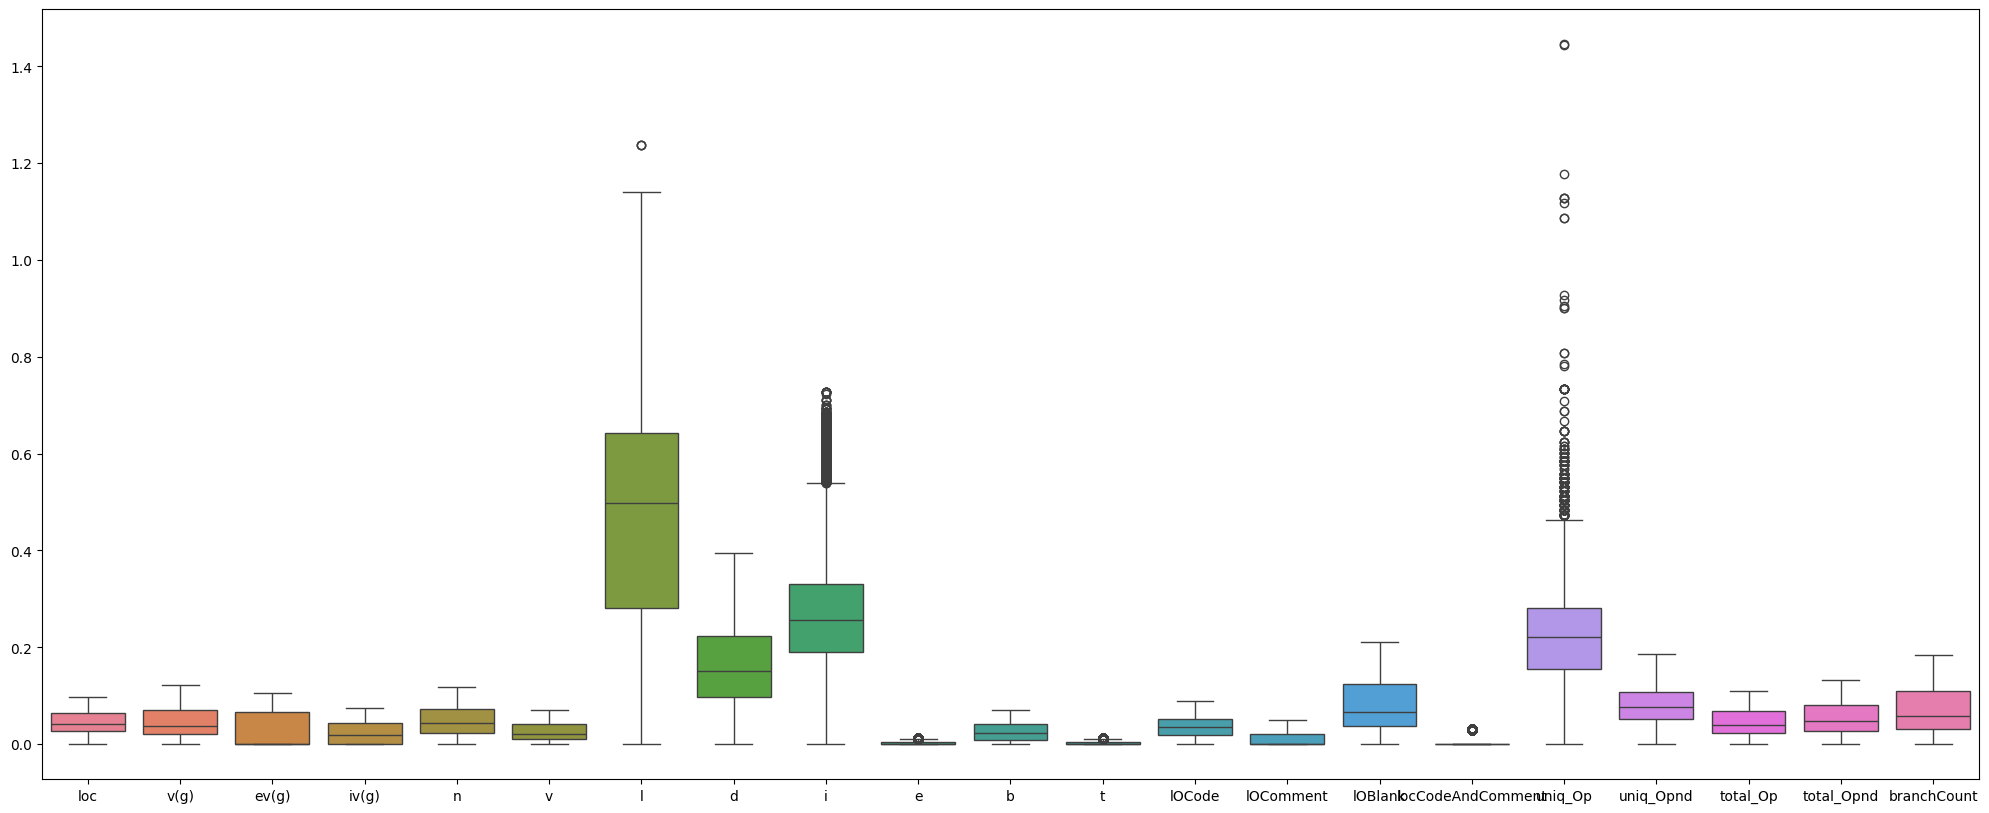

In [24]:
plt.figure(figsize=(25,10))
sns.boxplot(df_test)

Lets set X,Y, Target and also drop 2 bad columns

In [25]:
df_train = df_train.drop(columns=['i', 'uniq_Op'], axis= 1)
df_test = df_test.drop(columns=['i', 'uniq_Op'], axis= 1)

In [26]:
df_train.head(1)

,loc,v(g),ev(g),iv(g),n,v,l,d,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Opnd,total_Op,total_Opnd,branchCount
0,0.041201,0.036712,0.0,0.019214,0.048289,0.024779,0.379677,0.232979,0.002603,0.024166,0.002602,0.039744,0.020201,0.036659,0.0,0.062341,0.047006,0.050483,0.057742


<Axes: >

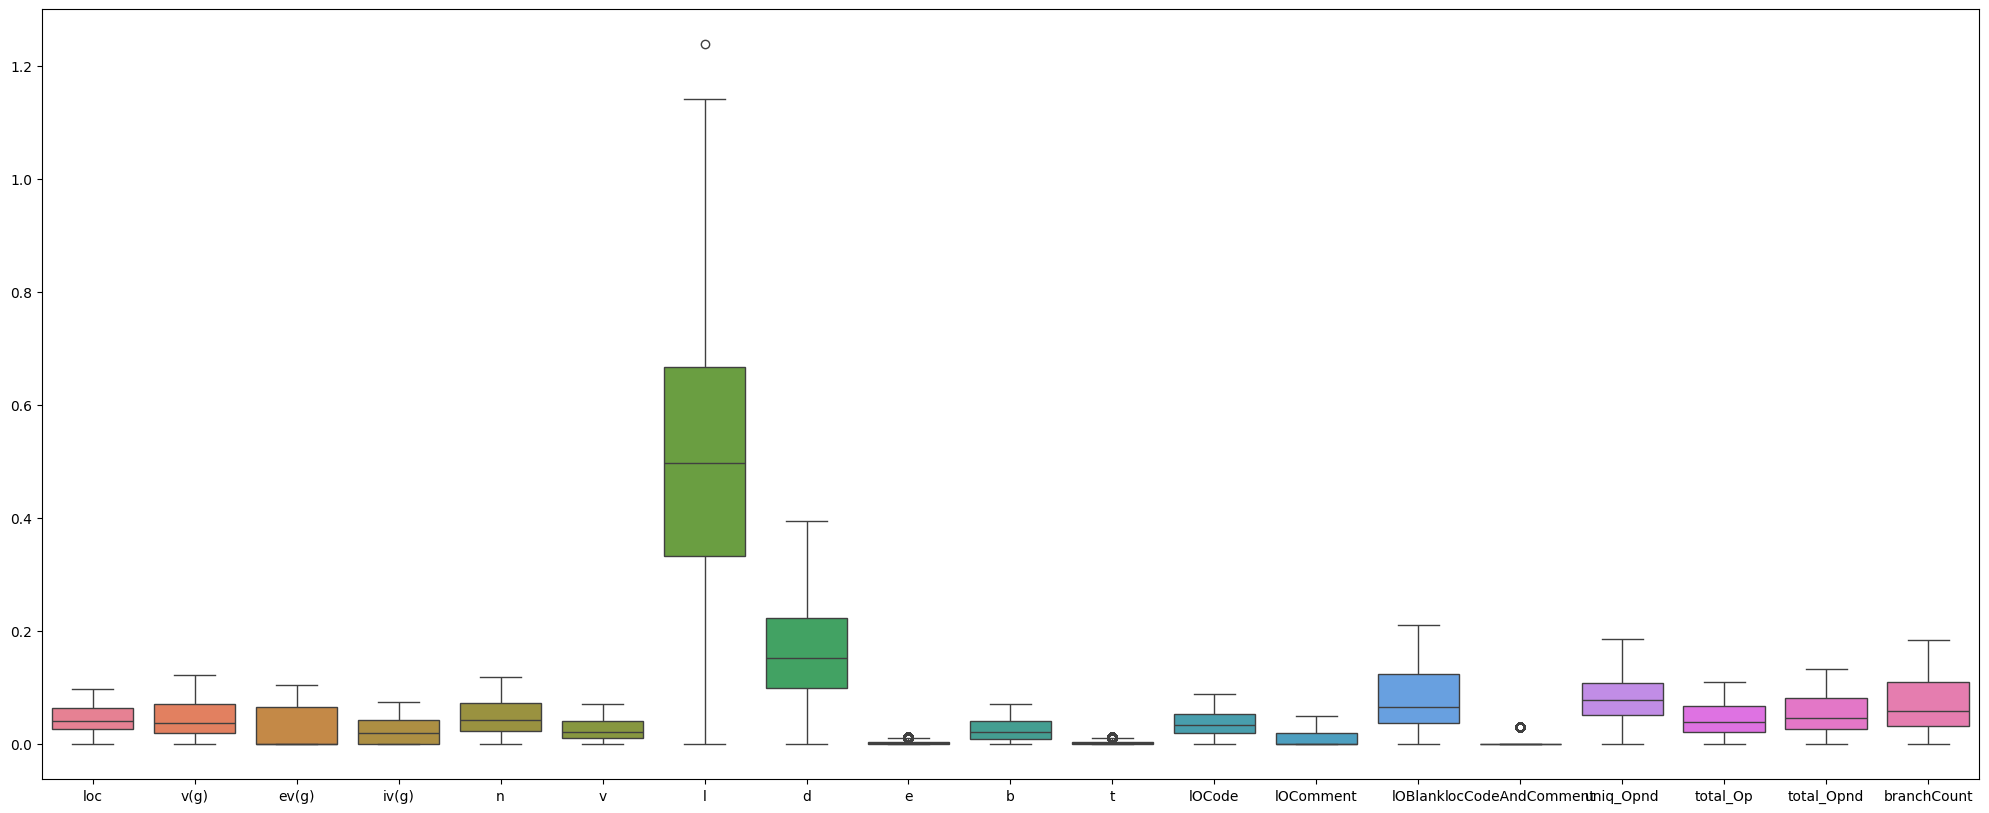

In [27]:
plt.figure(figsize=(25,10))
sns.boxplot(df_train)

<Axes: >

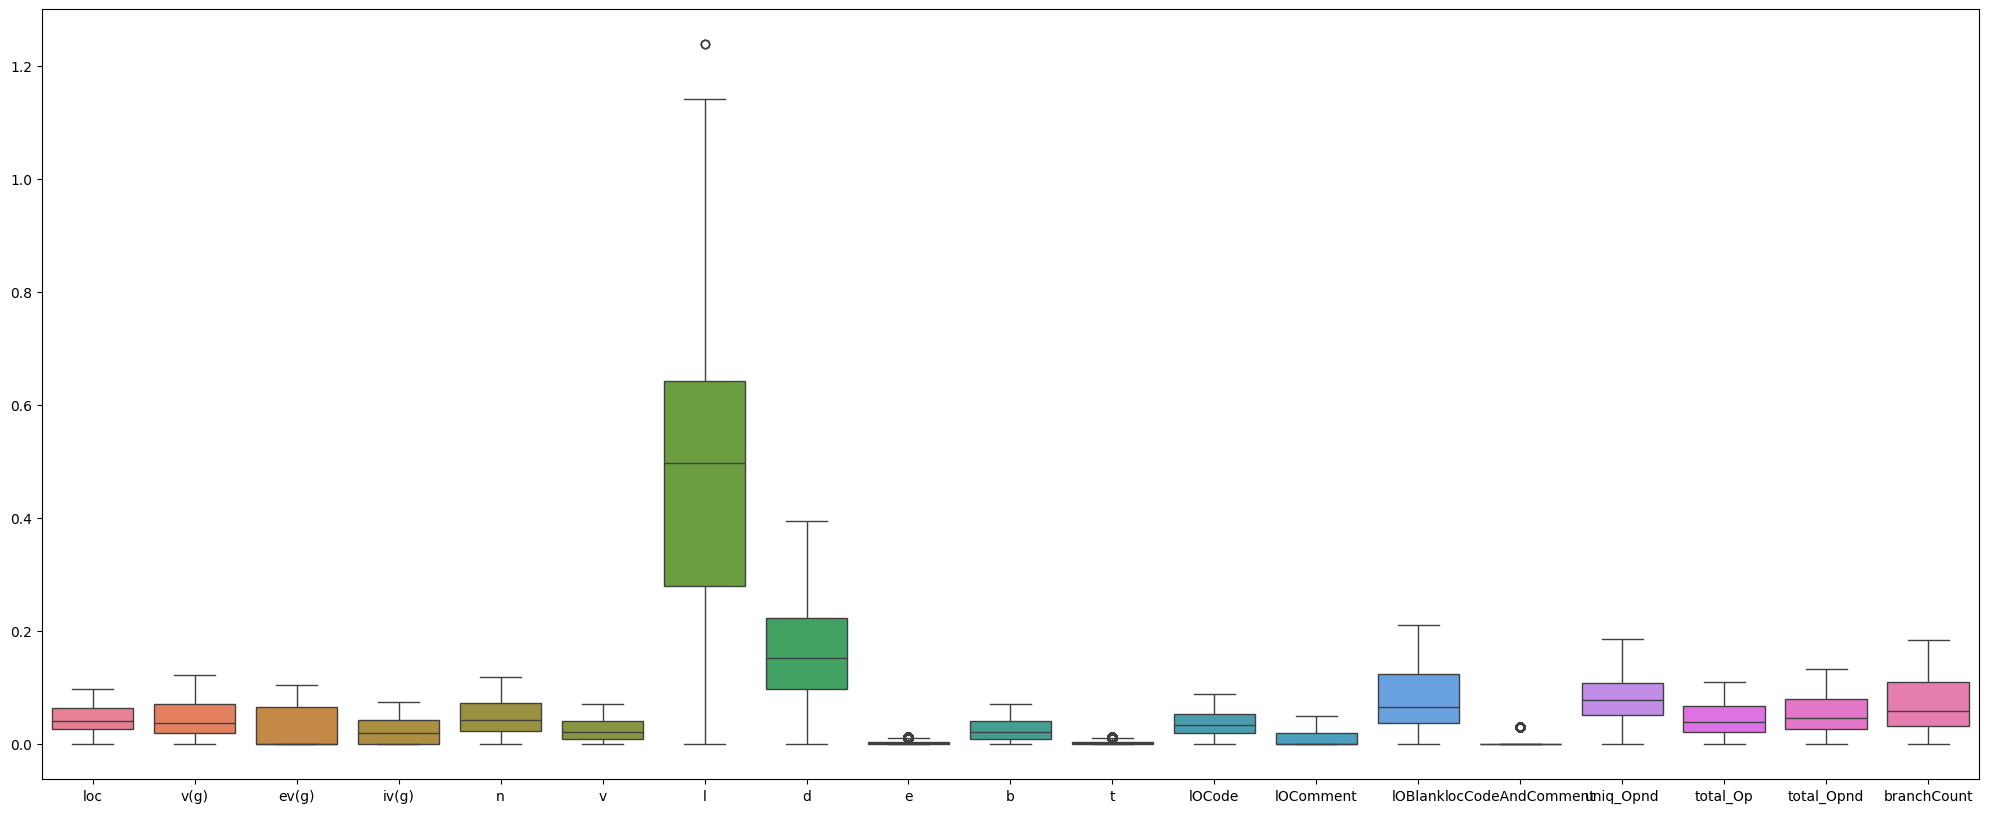

In [28]:
plt.figure(figsize=(25,10))
sns.boxplot(df_test)

Now looks better

In [29]:
data_x = df_train
data_y = defects_map

In [30]:
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=17)

x_train = x_train.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [31]:
y_train.value_counts()

defects_map
0    62854
1    18556
Name: count, dtype: int64

In [32]:
y_test.value_counts()

defects_map
0    15845
1     4508
Name: count, dtype: int64

Now lets build our ML models

In [33]:
c_values = np.logspace(-2, 3, 500)

In [34]:
logit_searcher = LogisticRegressionCV(Cs=c_values, cv=Skf, max_iter = 1000, verbose=0, scoring='roc_auc')

In [35]:
logit_searcher.fit(x_train, y_train)

LogisticRegressionCV(Cs=array([1.00000000e-02, 1.02334021e-02, 1.04722519e-02, 1.07166765e-02,
       1.09668060e-02, 1.12227736e-02, 1.14847155e-02, 1.17527712e-02,
       1.20270833e-02, 1.23077980e-02, 1.25950646e-02, 1.28890361e-02,
       1.31898690e-02, 1.34977233e-02, 1.38127630e-02, 1.41351558e-02,
       1.44650734e-02, 1.48026913e-02, 1.51481892e-02, 1.55017512e-02,
       1.58635653e-02, 1.62...
       6.45088409e+02, 6.60144909e+02, 6.75552832e+02, 6.91320378e+02,
       7.07455942e+02, 7.23968114e+02, 7.40865683e+02, 7.58157646e+02,
       7.75853206e+02, 7.93961785e+02, 8.12493021e+02, 8.31456781e+02,
       8.50863158e+02, 8.70722485e+02, 8.91045332e+02, 9.11842520e+02,
       9.33125118e+02, 9.54904456e+02, 9.77192128e+02, 1.00000000e+03]),
                     cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
                     max_iter=1000, scoring='roc_auc')

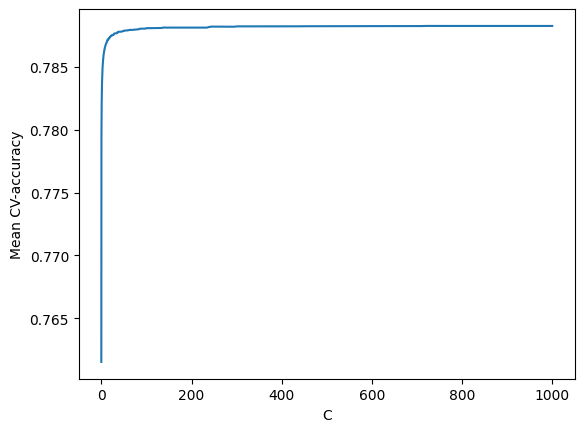

In [36]:
plt.plot(c_values, np.mean(logit_searcher.scores_[1], axis=0))
plt.xlabel("C")
plt.ylabel("Mean CV-accuracy");

In [37]:
LogisticRe_C_best = LogisticRegression(C=float(logit_searcher.C_), max_iter = 1000, n_jobs=-1, random_state=17)
LogisticRe_C_best.fit(x_train, y_train)

LogisticRegression(C=723.9681140910877, max_iter=1000, n_jobs=-1,
                   random_state=17)

In [38]:
LogisticRe_C_best.coef_, LogisticRe_C_best.intercept_

(array([[ 53.92147063,  -3.33631182,  -0.08968536,   2.62402582,
          -4.07888524,  25.06014016,   1.45884248,   0.5197093 ,
          33.46207822,  30.54256229,  34.40948777, -22.38941085,
          -3.30572174,   2.85974147,   4.40390725,   4.21637148,
         -11.4426919 , -22.04974858,   3.639037  ]]),
 array([-4.41355262]))

In [39]:
def tru_false_matrix(model, x, y):
    #
    if x.shape[0] == x_train.shape[0] or x.shape[0] == x_train.shape[0]:
        #
        plt.title('Train');
    elif x.shape[0] == x_test.shape[0]:
        #
        plt.title('Test');
    else:
        plt.title('Valid');
    sns.heatmap(metrics.confusion_matrix(y, model.predict(x)),
              annot=True, annot_kws={"size": 12}, cmap='Blues', fmt='g'),
    plt.ylabel('True labels'),
    plt.xlabel('Predicted labels'),
  #plt.title(a)
    plt.show()

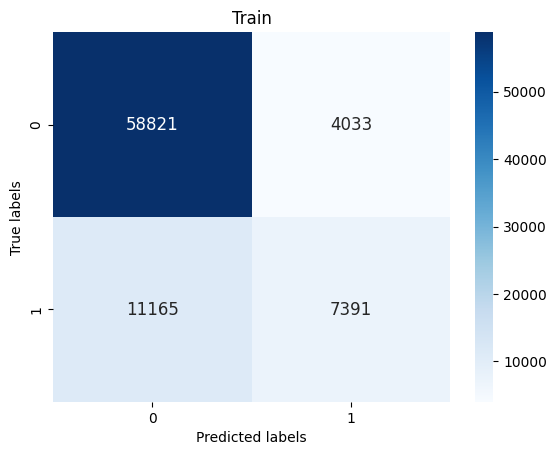

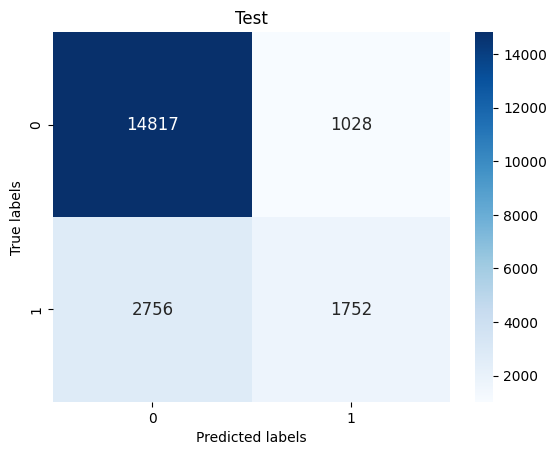

(None, None)

In [40]:
(
    tru_false_matrix(LogisticRe_C_best, x_train, y_train),

    tru_false_matrix(LogisticRe_C_best, x_test, y_test)
    )

In [41]:
def roc_cur(model, x_t = x_train, y_t = y_train, x_ts = x_test, y_ts = y_test):
    ##

  # train
    lr_probs_tr = model.predict_proba(x_t)
    lr_probs_tr = lr_probs_tr[:, 1]
    fpr_tr, tpr_tr, treshold_tr = roc_curve(y_t, lr_probs_tr)



  # test
    lr_probs_tst = model.predict_proba(x_ts)
    lr_probs_tst = lr_probs_tst[:, 1]
    fpr_tst, tpr_tst, treshold_tst = roc_curve(y_ts, lr_probs_tst)



    plt.figure(figsize=(10, 5))

    plt.plot(fpr_tr, tpr_tr, color='g',
          label='Train_ROC (area = %0.2f)' % auc(fpr_tr, tpr_tr))


    plt.plot(fpr_tst, tpr_tst, color='darkorange',
          label='Test_ROC (area = %0.2f)' % auc(fpr_tst, tpr_tst))


    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.title(model)
    plt.show()

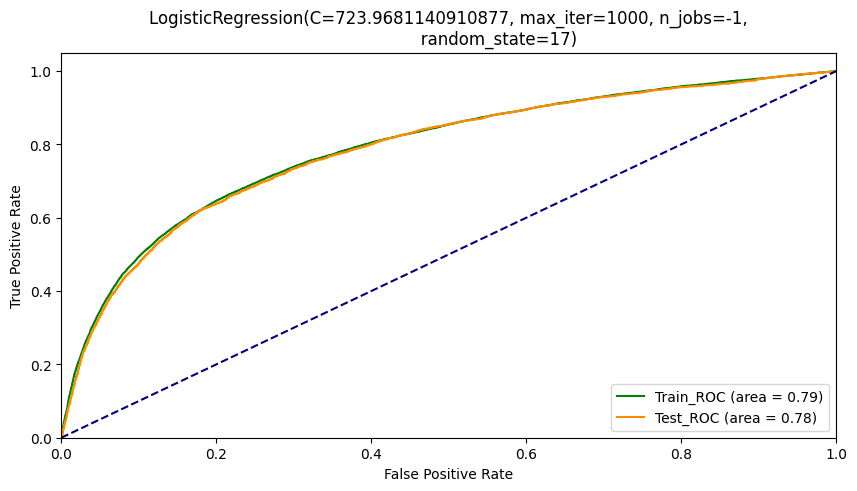

In [42]:
roc_cur(LogisticRe_C_best,x_t = x_train, y_t = y_train)

And lets get pipline for another ML models

In [43]:
pipeline = Pipeline([
    ('model', None)
])

In [44]:
# Define parameter grids for all models
param_grid = [
    #
    {
        
        'model': [KNeighborsClassifier()],
        'model__n_neighbors': list(range(5, 15)),
        'model__weights': ['uniform', 'distance'],
        'model__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    },

    { 
        'model': [LogisticRegression(penalty = 'l2', max_iter = 1000)],
        'model__C': list(range(1, 10)),
        'model__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
        'model__class_weight': [None, {0: 1, 1: 10}, {0: 1, 1: 5}, {0: 1, 1: 2}]
    },

    { 
        'model': [LogisticRegression(max_iter = 1000)],
        'model__C': list(range(1, 10)),
        'model__penalty': ['l1', 'l2', 'elasticnet', None],
        'model__class_weight': [None, {0: 1, 1: 10}, {0: 1, 1: 5}, {0: 1, 1: 2}]
    },

    { 
        'model': [XGBClassifier()],
        'model__max_depth': list(range(1, 9)),
        'model__booster': ['gbtree', 'gblinear'],
        'model__eta': [0.2, 0.3, 0.4, 0.6, 0.8, 0.9],
        'model__n_estimators':[50, 100, 150, 200, 250]
    }
]

In [45]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose = 0, refit=True, scoring='roc_auc')

In [46]:
grid_search.fit(x_train.to_numpy(), y_train.to_numpy())

GridSearchCV(cv=5, estimator=Pipeline(steps=[('model', None)]),
             param_grid=[{'model': [KNeighborsClassifier()],
                          'model__algorithm': ['auto', 'ball_tree', 'kd_tree',
                                               'brute'],
                          'model__n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13,
                                                 14],
                          'model__weights': ['uniform', 'distance']},
                         {'model': [LogisticRegression(max_iter=1000)],
                          'model__C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'model__class_weight...
                                                  max_leaves=None,
                                                  min_child_weight=None,
                                                  missing=nan,
                                                  monotone_constraints=None,
                                                  multi_strategy=None,
                                                  n_estimators=None,
                                                  n_jobs=None,
                                                  num_parallel_tree=None,
                                                  random_state=None, ...)],
                          'model__booster': ['gbtree', 'gblinear'],
                          'model__eta': [0.2, 0.3, 0.4, 0.6, 0.8, 0.9],
                          'model__max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                          'model__n_estimators': [50, 100, 150, 200, 250]}],
             scoring='roc_auc')

In [47]:
grid_search.best_params_

{'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...),
 'model__booster': 'gbtree',
 'model__eta': 0.2,
 'model__max_depth': 2,
 'model__n_estimators': 200}

In [48]:
gs_rfc_best_param = grid_search.best_estimator_

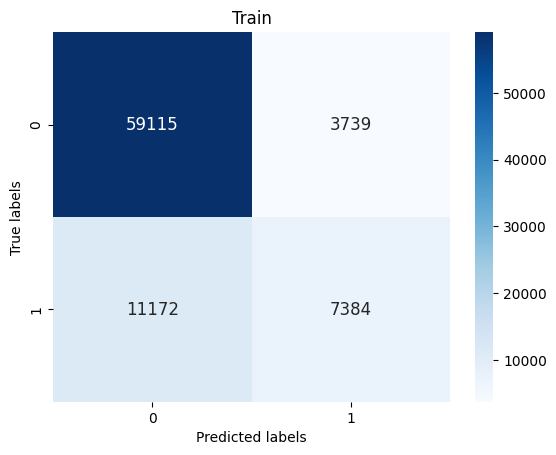

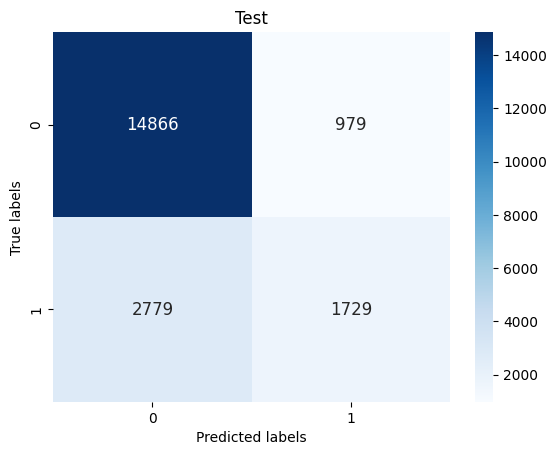

(None, None)

In [49]:
(
    tru_false_matrix(gs_rfc_best_param, x_train.to_numpy(), y_train.to_numpy()),

    tru_false_matrix(gs_rfc_best_param, x_test.to_numpy(), y_test.to_numpy())
    )

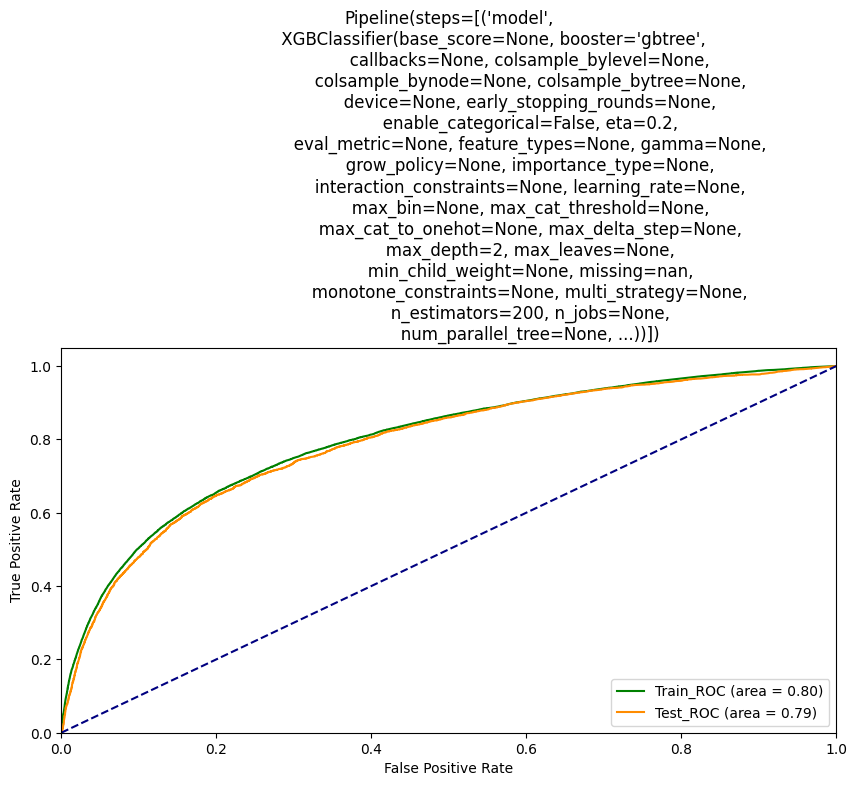

In [50]:
roc_cur(gs_rfc_best_param,x_t = x_train.to_numpy(), y_t = y_train.to_numpy())

Make results_df and metrics_df

In [51]:
results_df = pd.DataFrame(grid_search.cv_results_)

In [52]:
results_df.head(8)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_model__algorithm,param_model__n_neighbors,param_model__weights,param_model__C,param_model__class_weight,param_model__solver,param_model__penalty,param_model__booster,param_model__eta,param_model__max_depth,param_model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009754,0.002028,0.692240,0.052524,KNeighborsClassifier(),auto,5,uniform,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'model': KNeighborsClassifier(), 'model__algo...",0.714303,0.720479,0.721767,0.717447,0.716340,0.718067,0.002722,713
1,0.010180,0.002663,0.718470,0.020499,KNeighborsClassifier(),auto,5,distance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'model': KNeighborsClassifier(), 'model__algo...",0.715039,0.719080,0.721278,0.715679,0.713770,0.716969,0.002780,720
2,0.008997,0.000765,0.704322,0.003413,KNeighborsClassifier(),auto,6,uniform,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'model': KNeighborsClassifier(), 'model__algo...",0.723977,0.728131,0.727640,0.725743,0.723190,0.725736,0.001946,699
3,0.007030,0.001678,0.690534,0.026769,KNeighborsClassifier(),auto,6,distance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'model': KNeighborsClassifier(), 'model__algo...",0.724113,0.726588,0.727367,0.723769,0.721034,0.724574,0.002247,703
4,0.007808,0.001346,0.675621,0.023427,KNeighborsClassifier(),auto,7,uniform,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'model': KNeighborsClassifier(), 'model__algo...",0.733338,0.734768,0.734103,0.732830,0.727434,0.732495,0.002615,683
5,0.007129,0.002602,0.687174,0.014354,KNeighborsClassifier(),auto,7,distance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'model': KNeighborsClassifier(), 'model__algo...",0.732541,0.732894,0.733479,0.730933,0.725507,0.731071,0.002907,687
6,0.008441,0.001366,0.697134,0.038931,KNeighborsClassifier(),auto,8,uniform,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'model': KNeighborsClassifier(), 'model__algo...",0.739043,0.740326,0.740047,0.741380,0.732706,0.738700,0.003088,668
7,0.011896,0.002154,0.726027,0.025719,KNeighborsClassifier(),auto,8,distance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'model': KNeighborsClassifier(), 'model__algo...",0.738063,0.738015,0.738671,0.738460,0.730429,0.736728,0.003159,674


In [53]:
def some_fun(df):
    
    aaa = []
    for x in list(df['param_model'].unique()):
        
        for e in df[df['mean_test_score'] == df[df['param_model'] == x]['mean_test_score'].max()]. index:
            
            aaa.append(e)
            
    metrics_df = df.loc[aaa]
    metrics_df = metrics_df.sort_values(by='mean_test_score', ascending=False)
    metrics_df = metrics_df.reset_index(drop=True)
    return metrics_df

In [54]:
metrics_df = some_fun(results_df)

In [55]:
metrics_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_model__algorithm,param_model__n_neighbors,param_model__weights,param_model__C,param_model__class_weight,param_model__solver,param_model__penalty,param_model__booster,param_model__eta,param_model__max_depth,param_model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.253751,0.074191,0.008868,0.001006,"XGBClassifier(base_score=None, booster=None, c...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,gbtree,0.2,2,200,"{'model': XGBClassifier(base_score=None, boost...",0.792775,0.794449,0.796713,0.793472,0.784353,0.792352,0.004215,1
1,2.627149,0.920548,0.007850,0.000316,LogisticRegression(max_iter=1000),NaN,NaN,NaN,1,"{0: 1, 1: 10}",NaN,None,NaN,NaN,NaN,NaN,"{'model': LogisticRegression(max_iter=1000), '...",0.789938,0.789730,0.791991,0.791112,0.780171,0.788588,0.004288,79
2,2.908723,0.959598,0.009445,0.001448,LogisticRegression(max_iter=1000),NaN,NaN,NaN,2,"{0: 1, 1: 10}",NaN,None,NaN,NaN,NaN,NaN,"{'model': LogisticRegression(max_iter=1000), '...",0.789938,0.789730,0.791991,0.791112,0.780171,0.788588,0.004288,79
3,2.894496,1.083364,0.008641,0.000748,LogisticRegression(max_iter=1000),NaN,NaN,NaN,3,"{0: 1, 1: 10}",NaN,None,NaN,NaN,NaN,NaN,"{'model': LogisticRegression(max_iter=1000), '...",0.789938,0.789730,0.791991,0.791112,0.780171,0.788588,0.004288,79
4,2.356430,0.861419,0.007684,0.000833,LogisticRegression(max_iter=1000),NaN,NaN,NaN,4,"{0: 1, 1: 10}",NaN,None,NaN,NaN,NaN,NaN,"{'model': LogisticRegression(max_iter=1000), '...",0.789938,0.789730,0.791991,0.791112,0.780171,0.788588,0.004288,79
5,2.599348,1.133285,0.007840,0.000863,LogisticRegression(max_iter=1000),NaN,NaN,NaN,5,"{0: 1, 1: 10}",NaN,None,NaN,NaN,NaN,NaN,"{'model': LogisticRegression(max_iter=1000), '...",0.789938,0.789730,0.791991,0.791112,0.780171,0.788588,0.004288,79
6,2.622158,0.884124,0.007344,0.000664,LogisticRegression(max_iter=1000),NaN,NaN,NaN,6,"{0: 1, 1: 10}",NaN,None,NaN,NaN,NaN,NaN,"{'model': LogisticRegression(max_iter=1000), '...",0.789938,0.789730,0.791991,0.791112,0.780171,0.788588,0.004288,79
7,2.813641,1.136910,0.008356,0.000435,LogisticRegression(max_iter=1000),NaN,NaN,NaN,7,"{0: 1, 1: 10}",NaN,None,NaN,NaN,NaN,NaN,"{'model': LogisticRegression(max_iter=1000), '...",0.789938,0.789730,0.791991,0.791112,0.780171,0.788588,0.004288,79
8,2.455613,0.624404,0.007857,0.001220,LogisticRegression(max_iter=1000),NaN,NaN,NaN,8,"{0: 1, 1: 10}",NaN,None,NaN,NaN,NaN,NaN,"{'model': LogisticRegression(max_iter=1000), '...",0.789938,0.789730,0.791991,0.791112,0.780171,0.788588,0.004288,79
9,2.623493,1.060918,0.007297,0.000516,LogisticRegression(max_iter=1000),NaN,NaN,NaN,9,"{0: 1, 1: 10}",NaN,None,NaN,NaN,NaN,NaN,"{'model': LogisticRegression(max_iter=1000), '...",0.789938,0.789730,0.791991,0.791112,0.780171,0.788588,0.004288,79


In [56]:
model_list = []

for i in metrics_df['param_model'].unique():
    model_list.append(i)

In [57]:
LogisticRe_C_best

LogisticRegression(C=723.9681140910877, max_iter=1000, n_jobs=-1,
                   random_state=17)

In [58]:
model_list.append(LogisticRe_C_best)

In [59]:
model_list[-1]

LogisticRegression(C=723.9681140910877, max_iter=1000, n_jobs=-1,
                   random_state=17)

In [60]:
log_reg = model_list[1]
log_reg.fit(x_train.to_numpy(), y_train.to_numpy())

LogisticRegression(max_iter=1000)

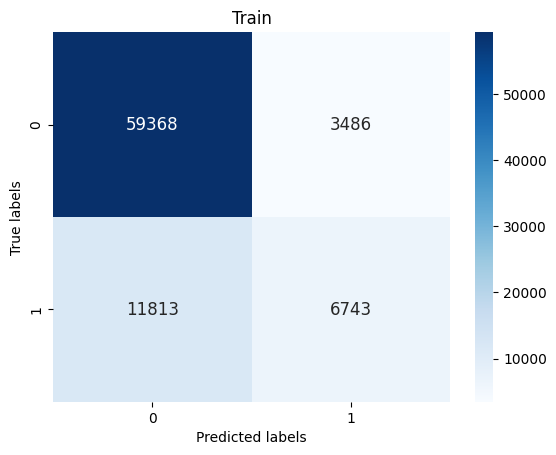

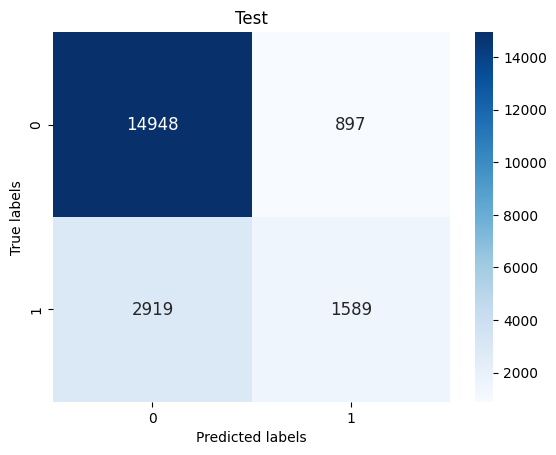

(None, None)

In [61]:
(
    tru_false_matrix(model_list[1], x_train.to_numpy(), y_train.to_numpy()),

    tru_false_matrix(model_list[1], x_test.to_numpy(), y_test.to_numpy())
    )

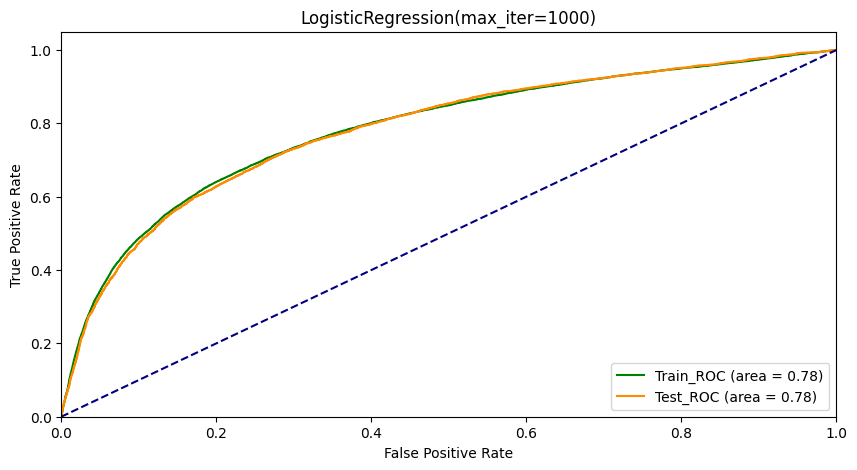

In [62]:
roc_cur(model_list[1],x_t = x_train.to_numpy(), y_t = y_train.to_numpy())

Bagging

In [63]:
bc_ = BaggingClassifier( random_state=17 )

In [64]:
param_grid_bc = {
    'base_estimator': [model_list[0], model_list[1]],
    'n_estimators': [10, 25, 50],
    'max_samples': [0.4, 0.6, 0.8, 0.9],
    'max_features': [0.4, 0.6, 0.8, 0.9]

}

In [65]:
gs_bc = GridSearchCV(bc_, param_grid_bc, cv=5, verbose = 0, refit=True, scoring='roc_auc')

In [66]:
gs_bc.fit(x_train.to_numpy(), y_train.to_numpy())

GridSearchCV(cv=5, estimator=BaggingClassifier(random_state=17),
             param_grid={'base_estimator': [XGBClassifier(base_score=None,
                                                          booster=None,
                                                          callbacks=None,
                                                          colsample_bylevel=None,
                                                          colsample_bynode=None,
                                                          colsample_bytree=None,
                                                          device=None,
                                                          early_stopping_rounds=None,
                                                          enable_categorical=False,
                                                          eval_metric=None,
                                                          feature_types=None,
                                                          gamma=None,
                                                          grow_policy=None,
                                                          impo...
                                                          max_delta_step=None,
                                                          max_depth=None,
                                                          max_leaves=None,
                                                          min_child_weight=None,
                                                          missing=nan,
                                                          monotone_constraints=None,
                                                          multi_strategy=None,
                                                          n_estimators=None,
                                                          n_jobs=None,
                                                          num_parallel_tree=None,
                                                          random_state=None, ...),
                                            LogisticRegression(max_iter=1000)],
                         'max_features': [0.4, 0.6, 0.8, 0.9],
                         'max_samples': [0.4, 0.6, 0.8, 0.9],
                         'n_estimators': [10, 25, 50]},
             scoring='roc_auc')

In [67]:
gs_bc.best_params_

{'base_estimator': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...),
 'max_features': 0.9,
 'max_samples': 0.4,
 'n_estimators': 50}

In [68]:
bc_best_param = gs_bc.best_estimator_

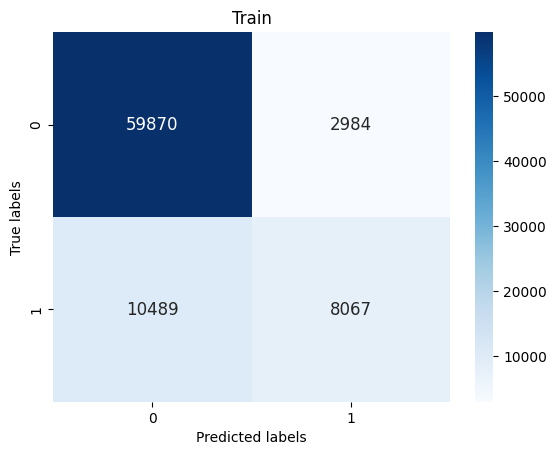

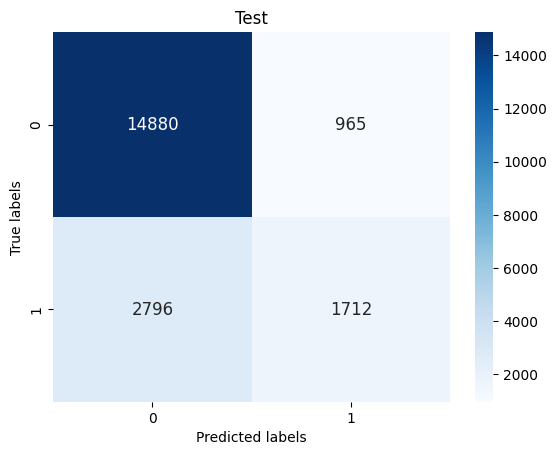

(None, None)

In [69]:
(
    tru_false_matrix(bc_best_param, x_train.to_numpy(), y_train.to_numpy()),
    
    tru_false_matrix(bc_best_param, x_test.to_numpy(), y_test.to_numpy())
    )

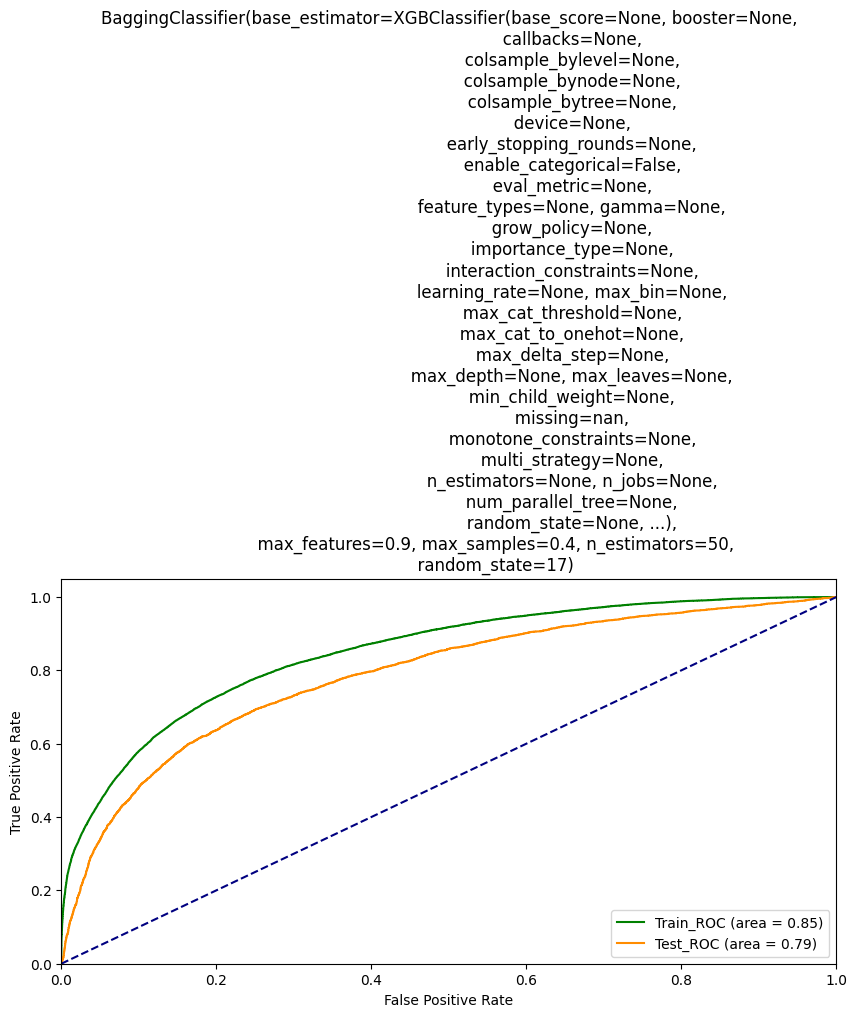

In [70]:
roc_cur(bc_best_param,x_t = x_train.to_numpy(), y_t = y_train.to_numpy())

Prediction:

In [71]:
submission_csv = pd.DataFrame({'id': data_test['id']})

In [72]:
submission_csv['defects'] = bc_best_param.predict(df_test.to_numpy())

submission_csv.to_csv('submission_csv.csv', index=False)

In [73]:
### This how was

submission_csv.head()

,id,defects
0,101763,0
1,101764,0
2,101765,1
3,101766,1
4,101767,0


In [74]:
### This how actually was need

submission_csv['defects'] = pd.DataFrame(bc_best_param.predict_proba(df_test.to_numpy()))[1]

submission_csv.head()

,id,defects
0,101763,0.194356
1,101764,0.153525
2,101765,0.688688
3,101766,0.515592
4,101767,0.144403
